http://www.mpipks-dresden.mpg.de/~tisean/windows_3.0.0.html

* Download the archive: TISEAN_3.0.0-windows.zip 
* Extract the files from the archive to the directory you like. The binaries are located in the bin subfolder.
* If the bin directory is not in your PATH environment variable, you may add it
* Run the programs


In [1]:
from pytisean import tiseano, tiseanio
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


TISEAN 2.1 (C) R. Hegger, H. Kantz, T. Schreiber

henon: Henon map
opened C:\private\tmp\pytisean_temp_2017-01-23-18-33-16_ze7i0lzd.dat for output



C:\Users\tamaghna\Anaconda4\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


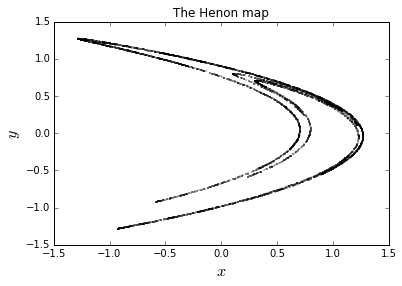

In [3]:
# Generate 5000 iterates of the henon map
henon, msg = tiseano('henon', '-l5000')

# Plot and prettyfi
fig1, ax1 = plt.subplots(1, 1)
ax1.scatter(henon[:, 0], henon[:, 1], color='k', s=0.1)
ax1.set_title('The Henon map')
ax1.set_xlabel(r'$x$', fontsize=16)
ax1.set_ylabel(r'$y$', fontsize=16)
plt.show()


TISEAN 2.1 (C) R. Hegger, H. Kantz, T. Schreiber

corr: Estimates the autocorrelations of a data set

Using C:\private\tmp\pytisean_temp_2017-01-23-18-33-46_s_y0awye.dat as datafile, reading column 1
Use 1000 lines.
Opened C:\private\tmp\pytisean_temp_2017-01-23-18-33-46_wszpmc24.dat for writing



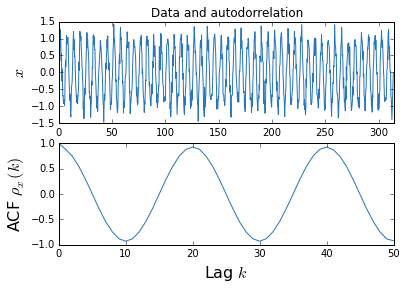

In [4]:
# Generate some data
N = 1000
t = np.linspace(0, N/10*np.pi, N)
x = np.sin(t) + 0.2*np.random.randn(N)
#  ... and compute the autocorrelation
acf, msg = tiseanio('corr', '-D', 50, data=x)

# Plot and prettyfi
bluish = '#2976bb' # https://xkcd.com/color/rgb/
fig2, ax2 = plt.subplots(2, 1)

ax2[0].set_title(r'Data and autodorrelation')
ax2[0].plot(t, x, color=bluish)
ax2[0].set_xlim(t[0], t[-1])
ax2[0].set_xlabel(r'$t$', fontsize=16)
ax2[0].set_ylabel(r'$x$', fontsize=16)

ax2[1].plot(acf[:, 0], acf[:, 1], color=bluish)
ax2[1].set_xlabel(r'Lag $k$', fontsize=16)
ax2[1].set_ylabel(r'ACF $\rho_x(k)$', fontsize=16)

plt.show()

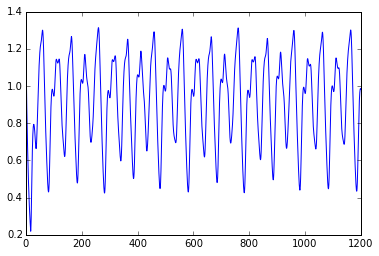

In [5]:
# Mackey-Glass time delay time differential equation
a        = 0.2      # value for a in eq (1)
b        = 0.1      # value for b in eq (1)
tau      = 17       # delay constant in eq (1)
x0       = 1.2      # initial condition: x(t=0)=x0
deltat   = 0.1      # time step size (which coincides with the integration step)
sample_n = 12000    # total no. of samples, excluding the given initial condition
interval = 1        # output is printed at every 'interval' time steps

time = 0
index = 1
history_length = int(np.floor(tau/deltat))
x_history = np.zeros(history_length) # here we assume x(t)=0 for -tau <= t < 0
x_t = x0

X = np.zeros(sample_n+1) # vector of all generated x samples
T = np.zeros(sample_n+1) # vector of time samples

def mackeyglass_eq(x_t, x_t_minus_tau, a, b):
    # print(a,b, x_t, x_t_minus_tau)
    x_dot = -b*x_t + a*x_t_minus_tau/(1 + x_t_minus_tau**10.0)
    return x_dot

def mackeyglass_rk4(x_t, x_t_minus_tau, deltat, a, b):
    k1 = deltat*mackeyglass_eq(x_t,          x_t_minus_tau, a, b)
    k2 = deltat*mackeyglass_eq(x_t+0.5*k1,   x_t_minus_tau, a, b)
    k3 = deltat*mackeyglass_eq(x_t+0.5*k2,   x_t_minus_tau, a, b)
    k4 = deltat*mackeyglass_eq(x_t+k3,       x_t_minus_tau, a, b)
    x_t_plus_deltat = (x_t + k1/6 + k2/3 + k3/3 + k4/6)
    return x_t_plus_deltat

for i in range(1,sample_n+1):
    X[i-1] = x_t;
    if (i-1 % interval == 0):
        print('%s %s' % ((i-1)/interval, x_t))
    if tau == 0:
        x_t_minus_tau = 0.0
    else:
        x_t_minus_tau = x_history[index-1]
    
    # print("x(t-tau): %s" % x_t_minus_tau)
    x_t_plus_deltat = mackeyglass_rk4(x_t, x_t_minus_tau, deltat, a, b)
    # print("x(t + delta_t): %s" % x_t_plus_deltat)
    
    if (tau != 0):
        x_history[index-1] = x_t_plus_deltat
        index = index % history_length +1
        
    time = time + deltat
    T[i] = time
    x_t = x_t_plus_deltat

T = T[:-1]
X = X[:-1]
plt.figure()
plt.plot(T, X)
#plt.set_xlim(0, T(end))


TISEAN 2.1 (C) R. Hegger, H. Kantz, T. Schreiber

spectrum: Fourier power spectrum
opened C:\private\tmp\pytisean_temp_2017-01-23-18-35-11_4ez8_g8d.dat for input
     12000 values read from file: C:\private\tmp\pytisean_temp_2017-01-23-18-35-11_4ez8_g8d.dat
opened C:\private\tmp\pytisean_temp_2017-01-23-18-35-11_2t_2gn78.dat for output



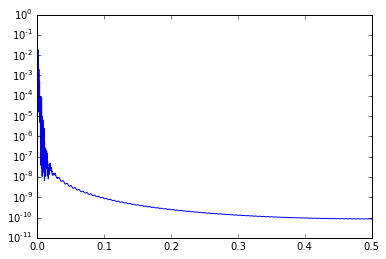

In [7]:
spec, _ = tiseanio('spectrum', "-c#", data=X)
freq = spec[:,0]
amp = spec[:,1]
plt.semilogy(freq,amp)


TISEAN 3.0.0 (C) R. Hegger, H. Kantz, T. Schreiber (1998-2007)

corr: Estimates the autocorrelations of a data set

Using C:\private\tmp\pytisean_temp_2017-01-23-22-39-55_bilufh82.dat as datafile, reading column 1
Use 12000 lines.
Opened C:\private\tmp\pytisean_temp_2017-01-23-22-39-55_8ispd9h8.dat for writing



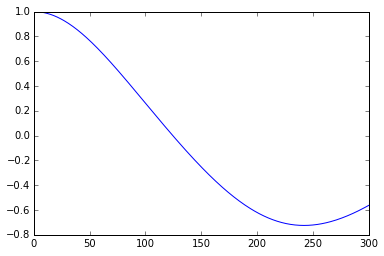

In [157]:
acf, msg = tiseanio('corr', '-D', 300, data=X)
plt.plot(acf[:, 0], acf[:, 1])

## Mutual

Estimates the time delayed mutual information of the data. It is the simplest possible realization.

Parameters: 

-c, columns to read ---- required 

-D, max delay ----- optional, default is 20

-b, boxes for partition --- optional, default is 16 ---> this influences the values of entropy and therefore the delay. You should change this to get a range for embedding delays

-V, verbosity ----- optional, default is 1 -- input/out messages



dimensions 111


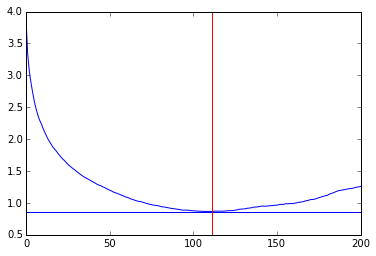

In [32]:
mutual_data, _ = tiseanio('mutual','-c', 1, '-D',200, '-V',0, '-b',64, data=X)
plt.plot(mutual_data[:,0], mutual_data[:,1])
plt.axhline(min(mutual_data[:,1]))

min_mutual = min(mutual_data[:,1])
dim = min([i for i, v in enumerate(mutual_data[:,1]) if v == min_mutual])
plt.axvline(dim, color='red')
print('dimensions %s' % dim)

## False_Nearest

This program looks for the nearest neighbors of all data points in m dimensions and iterates these neighbors one step (more precisely delay steps) into the future. If the ratio of the distance of the iteration and that of the nearest neighbor exceeds a given threshold the point is marked as a wrong neighbor. The output is the fraction of false neighbors for the specified embedding dimensions

Parameters: 

-c columns to read

-V verbosity, default: 1


-m minimal embedding dimension

-M maximal embedding dimesion

-d delay of vecotrs

-f ratio factor, default: 2.0

-t thieler window, default: 0.0


output:
* first column: the dimension (counted like shown above) 
* second column: the fraction of false nearest neighbors
* third column: the average size of the neighborhood
* fourth column: the average of the squared size of the neighborhood


3.0


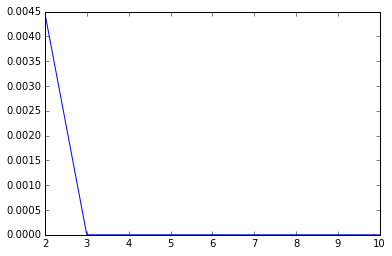

In [46]:
# run this afer estimating the delay
data,_ = tiseanio('false_nearest', '-c', 1, '-V', 0, '-m',2,'-M',10,'-d',107,'-t',100, data=X)

plt.plot(data[:,0], data[:,1])

R = data[:, 1]
I_min = min([i for i, v in enumerate(R) if v ==0])
embed_dim = data[:,0][I_min]
print(embed_dim)

### Vizualization of Phase space using PCA

http://www.mpipks-dresden.mpg.de/~tisean/Tisean_3.0.1/docs/docs_c/pca.html
http://www.mpipks-dresden.mpg.de/~tisean/Tisean_3.0.1/docs/chaospaper/node10.html#SECTION00033000000000000000

Parameters: 

-m: embedding dimension

-d: delay

-W: 3 (0: eigenvalues, 1: eigenvectors, 2: transformation of the time series into eigenbasis, the number of componens is determined by -q flag), 3: Project the time series onto the first -q eigenvectors

-q: depends on -W( -W2: number o components written, -W3: Projection dimension)

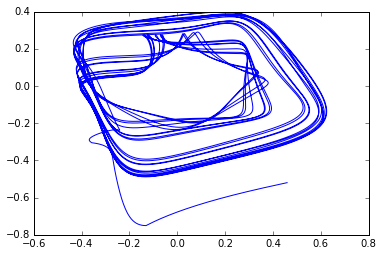

In [89]:
pc, _ = tiseanio('pc', '-c',1,'-V',0, '-m', 3, '-d', 107, '-W',3, '-q', 3, data=X)

pc1 = pc[:,0]
pc2 = pc[:,1]
pc3 = pc[:,2]
plt.plot(pc1, pc2)

## Non Linear Prediction

http://wiki.octave.org/TISEAN_package#Testing_for_Nonlinearity
http://www.mpipks-dresden.mpg.de/~tisean/Tisean_3.0.1/docs/chaospaper/node18.html#SECTION00052000000000000000

There are three functions in this section: lzo_test, lzo_gm and lzo_run. The first is used to estimate the forecast error for a set of chosen parameters, the second gives some global information about the fit and the third produces predicted points. 

In [104]:
res1 = tiseanio('lzo-test', '-c', 1, '-d', 104, '-s',100, '-m', '1,3', '-V', 0, data=X)
res2 = tiseanio('lzo-test', '-c', 1, '-d', 105, '-s',100, '-m', '1,3', '-V', 0, data=X)
res3 = tiseanio('lzo-test', '-c', 1, '-d', 107, '-s',100, '-m', '1,3', '-V', 0, data=X)
res4 = tiseanio('lzo-test', '-c', 1, '-d', 111, '-s',100, '-m', '1,3', '-V', 0, data=X)

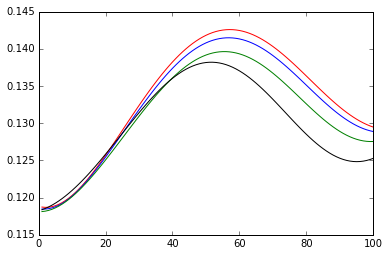

In [105]:
plt.plot(res1[0][:,0], res1[0][:,1],'r')
plt.plot(res2[0][:,0], res2[0][:,1],'b')
plt.plot(res3[0][:,0], res3[0][:,1],'g')
plt.plot(res4[0][:,0], res4[0][:,1],'k')

It seems that the last pair (m = 3, d = 111) is suitable. We will use it to determine the the best neighborhood to use when generating future points.


0.01171091


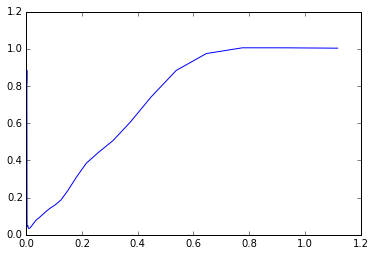

In [118]:
# lzo-gm: This program performs a constant (zeroth order) fit as a function of the neighborhood size.
# The output consists of dimension+4 columns for each neighborhood size:
#    - neighborhood size (units of the data)
#    - relative forecast error ((forecast error)/(variance of the data))
#    - relative forecast errors for the individual components of the vector
#    - fraction of points for which neighbors were found for this neighborhood size
#    - average number of neighbors found per point
#    - variance of the fraction of points for which neighbors were found
res1 = tiseanio('lzo-gm', '-c', 1, '-d', 104, '-s',100, '-m', '1,3', '-V', 0, data=X)
forecast_data = res1[0]
optimal_neighborhood = forecast_data[:,0][np.argmin(forecast_data[:,1])]
print(optimal_neighborhood)
plt.plot(res1[0][:,0],res1[0][:,1])

After analyzing neighborhood_size vs. forecast error, it is easy to observe that the least error is for the neighborhood size of gm which is equal to 0.01171091. We will use it to produce the prediction vectors. Only the first 11800 datapoints from amplitude are used in order to compare the predicted values with the actual ones for the last 200 points.

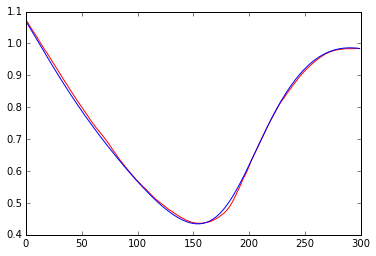

In [134]:
steps=300
train_X = X[:len(X)-steps-1]
train_Y = X[len(X)-steps:]
forecast = tiseanio('lzo-run', '-m','1,3','-d',111,'-r',optimal_neighborhood, '-L', steps, '-V', 0, data=train_X)
plt.plot(forecast[0],color='red')
plt.plot(train_Y,color='blue')

## Lyapunov exponents

lyap_k. It estimates the maximal Lyapunov exponent from a time series (more information available from the TISEAN documentation located here). In this tutorial we will estimate the maximal Lyapunov exponent for various embedding dimensions and then plot them


In [158]:
# lyap_exp = lyap_k (in, 'mmin',2,'mmax',mmax_val,'d',6,'s',400,'t',500);

lyap_exp = tiseanio('lyap_k', '-m',2, '-M', 3, '-d', 111, '-s', 400, '-t', 500, '-V', 0, data=X)

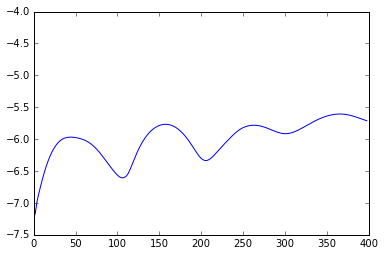

In [160]:
y = lyap_exp[0][400:799,1]
plt.plot(y)